# Analysis
In this notebook that analysis is done. 

Things that are done in this section:
- Implement functions that exctract information from the .dat files
   - The header
   - The contribution summary
   - The contribution per generation

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import *
import simulation

In [24]:
#testFile = "TestSimulation.dat"
testFile = "figure4__100000_4_2_100_FirstRound_0.50_0.50_1000_1_4_StepWiseLinear_1_10.00.dat"

Detail TestSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.8
    wealthPoor = 1
    wealthRich = 1
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = False

Detail TestHeteroSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.5
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = True
    

## Reading the file

### ReadingHeader

In [26]:
header = readHeader(filename = testFile)
header

{'alpha_poor': 0.5,
 'alpha_rich': 0.5,
 'group_size': 2.0,
 'heterogenous': 1.0,
 'lambda_value': 10.0,
 'nr_generations': 100000.0,
 'number_of_games': 1000.0,
 'number_of_rounds': 4.0,
 'population_size': 100.0,
 'risk_in_round': 'FirstRound',
 'type_of_risk_curve': 'StepWiseLinear',
 'wealth_poor': 1.0,
 'wealth_rich': 4.0}

### Reading the contribution 

In [27]:
ContributionArray = readContributionFileToData(fileName = testFile, heterogeneous = header["heterogenous"], rounds = int(header["number_of_rounds"]))
ContributionArray.shape

(100000, 2, 4)

/usr/lib/python3/dist-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


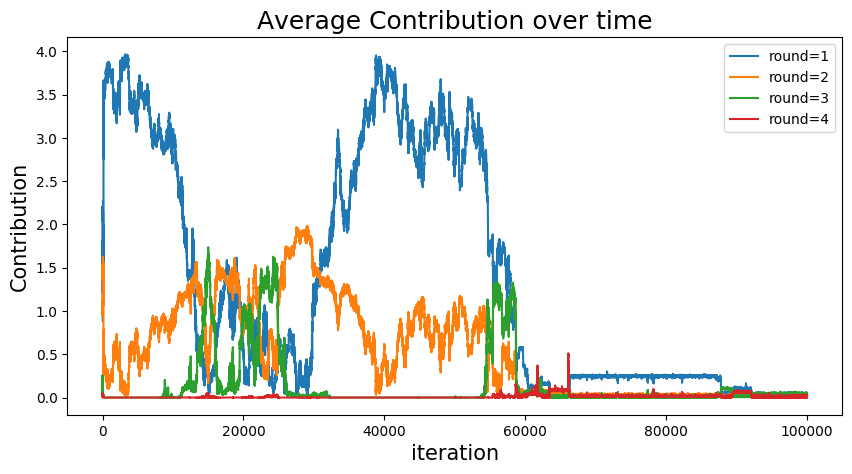

In [28]:
fig = plotContributionVsGeneration(ContributionArray,True)

### Reading summary

In [29]:
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 1.074411,
 'AverageContributionPerRoundPoor': array([0.032465, 0.024197, 0.044682, 0.023987]),
 'AverageContributionPerRoundRich': array([1.33769 , 0.527399, 0.148458, 0.009456])}

-------
Things to further do:
- Combine the information of multiple simulations in one plot
- Make plots of the paper.

# Plotting Figure4

In [65]:
def readFigure4Data():
    # Predefine some of the data:

    generations = 100000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100
    numberOfGames = 1000
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = simulation.RiskCurve(3)
    heterogeneous = 1
    globalLambdaValue = 10.00
    
    filename = "figure4_"

    arrayRiskInRound = np.arange(1,5)# [1,2,3,4]
    arrayAlphaPoor = np.array([1.0,1.0,0.5,0.5])
    arrayAlphaRich = np.array([1.0,0.8,0.8,0.5])
    
    ContributionFig4 = np.empty(shape=(4,4,2,4))# [alphaConfiguration,riskInRound,wealth,round]=
    
    for row, (alphaPoor, alphaRich) in enumerate(zip(arrayAlphaPoor,arrayAlphaRich)):
        for column in range(4):
            riskInRound = simulation.RiskInRound(column+1)
            
            #### Load the file and the header #####
            StringName = "%s_%d_%d_%d_%d_%s_%0.2f_%0.2f_%d_%d_%d_%s_%d_%0.2f.dat" % (filename, generations, numberOfRounds, groupSize, popSize, riskInRound.name, alphaPoor, alphaRich, numberOfGames, wealthPoor, wealthRich, typeOfRiskCurve.name, heterogeneous, globalLambdaValue)
            HeaderFile = readHeader(filename=StringName)
            
            #### Compute the averaging over the relevant itterations #####
            # For now just read summary one can also read out the full contribution and be more specific with the averaging.
            summary = readSummary(filename=StringName,heterogeneous=HeaderFile["heterogenous"])
            
            #### Save the contribution levels in the tensor #####
            ContributionFig4[row,column,0,:] = summary['AverageContributionPerRoundPoor']
            ContributionFig4[row,column,1,:] = summary['AverageContributionPerRoundRich']
    
    return ContributionFig4

ContributionFig4 = readFigure4Data()
ContributionFig4.shape

(4, 4, 2, 4)

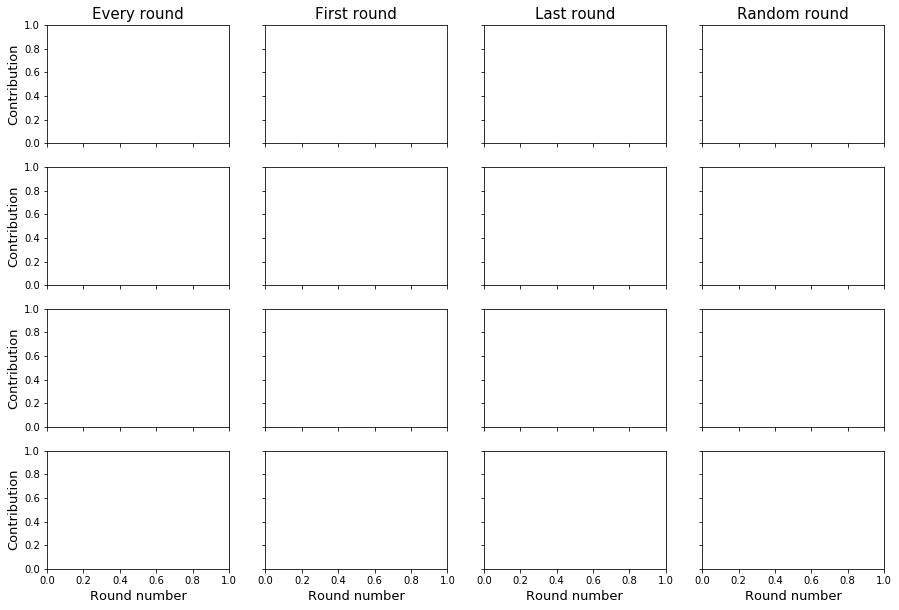

In [70]:
def plotFigure4(ContributionTensor):
    """ Plots Figure 4 of the paper
    Attribute:
        -ContributionTensor: a 4 dimensional numpy tensor where the indexes correspond to:
            ContributionTensor[alphaConfiguration,riskInRound,wealth,round]
    """
    fig, axs = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True,figsize=(15,10))
    
    Column_title = ["Every round", "First round", "Last round", "Random round"]
    y_axis_label = "Contribution"
    x_axis_label = "Round number"
    
    for row, axs_row in enumerate(axs):
        for column, ax  in enumerate(axs_row):
            ### Set 
            if row == 0:
                ax.set_title(Column_title[column], fontsize=15)
            if column == 0:
                ax.set_ylabel(y_axis_label, fontsize=13)
            if row == 3:# aka the last row
                ax.set_xlabel(x_axis_label, fontsize=13 )
                
    
plotFigure4(ContributionFig4)